# Timeseries Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display
import scipy
from scipy.signal import savgol_filter
from pathlib import Path

# To have a better diplay of the DataFrame
from IPython.display import display

print(f'Pandas : {pd.__version__}')
print(f'GeoPandas : {gpd.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')
print(f'Scipy : {scipy.__version__}')

Pandas : 1.1.5
GeoPandas : 0.8.1
Matplotlib : 3.3.4
Scipy : 1.5.2


## Set paths for input and output directories

In [4]:
grp_letter   = 'X'
student_name = 'ndeffense'

# When you are connected to the computer room
'''
vector_path = 'X:/data/VECTOR/'
output_path = f'X:/GROUP_{grp_letter}/TP/{student_name}/DATA/'
'''

# When you are connected to your personnal computer
vector_path = '/Users/Nicolas/OneDrive - UCL/LBRAT2104/VECTOR/'
output_path = '/Users/Nicolas/OneDrive - UCL/LBRAT2104/Output/'


print(f'Vector input path is set to : {vector_path}')
print(f'Output path is set to       : {output_path}')


Vector input path is set to : /Users/Nicolas/OneDrive - UCL/LBRAT2104/VECTOR/
Output path is set to       : /Users/Nicolas/OneDrive - UCL/LBRAT2104/Output/


# Extract reflectances from shapefile

- 1580076457 = Potato (non-early)
- 1580135170 = Common wheat (winter)
- 1990011176 = Maize (for livestock)
- 1805103211 = Grassland

In [5]:

band_list = [4,8]

ref_id_list = [1580076457,
               1580135170,
               1990011176,
               1805103211]

df_list = []

for band in band_list:
    
    parcels_shp = f'{vector_path}Parcels_Extract_S2/S2_2018_B{band}.shp'
    
    gdf = gpd.read_file(parcels_shp)
    
    df = gdf.drop(columns='geometry')
    
    df = df.loc[df['REF_ID'].isin(ref_id_list)]
    
    df = df.transpose()
    
    # Rename columns

    new_header = df.iloc[0].astype(int).astype(str)
    
    new_header += f'_B0{band}'
    
    df = df[1:]
    
    df.columns = new_header
    
    # Convert date from string (eg : 180801) to datetime object (eg : 2018-08-01)

    df.index = pd.to_datetime(df.index, format='%y%m%d')
    
    # Sort DataFrame by date

    df = df.sort_index()
    
    df_list.append(df)


all_band_df = pd.concat(df_list, axis=1)

display(all_band_df)


REF_ID,1580135170_B04,1805103211_B04,1990011176_B04,1580076457_B04,1580135170_B08,1805103211_B08,1990011176_B08,1580076457_B08
2018-01-21,2955.910714,3081.227642,3200.734286,3129.024922,3344.052381,3927.912892,3564.168571,3842.937695
2018-02-05,147.869048,36.959350,1210.220000,60.443406,548.100000,4208.283391,1616.300000,2490.902388
2018-02-07,4142.432143,5680.322880,6871.065714,2923.644860,4145.205952,6015.829268,6784.351429,4819.170301
2018-02-12,731.063095,130.893148,2370.391429,315.905504,2281.547619,5175.437863,3190.188571,2316.489097
2018-02-17,778.435714,321.253194,957.160000,885.460021,2178.859524,4332.901278,1349.905714,2096.700935
2018-02-20,1507.830952,3581.458769,3583.582857,1707.480789,2133.540476,4030.966318,4086.262857,2355.755971
2018-02-22,712.044048,355.855981,938.114286,968.360332,2051.572619,4498.103368,1324.642857,1923.564901
2018-02-25,880.211905,423.782811,1862.631429,1157.840083,2165.267857,4026.176539,2429.422857,2022.539979
2018-02-27,1190.408333,62.003484,2420.951429,907.790239,2812.045238,1558.404181,3112.354286,1533.013499
2018-03-04,624.786905,544.357724,720.645714,704.109034,1247.802381,1695.831591,1121.865714,1171.714434


# Compute NDVI in pandas DataFrame
- create a function that computes NDVI from NIR (B08) and RED (B04) reflectances
- apply this function bewteen columns in DataFrame

In [6]:
df = all_band_df


# ----------------------------------------

def compute_NDVI(red, nir):
    
    ndvi = (nir-red)/(nir+red)
    
    return ndvi

# ----------------------------------------



for ref_id in ref_id_list:
    
    df[f'NDVI_{ref_id}'] = compute_NDVI(df[f'{ref_id}_B04'],df[f'{ref_id}_B08'])

display(df)


REF_ID,1580135170_B04,1805103211_B04,1990011176_B04,1580076457_B04,1580135170_B08,1805103211_B08,1990011176_B08,1580076457_B08,NDVI_1580076457,NDVI_1580135170,NDVI_1990011176,NDVI_1805103211
2018-01-21,2955.910714,3081.227642,3200.734286,3129.024922,3344.052381,3927.912892,3564.168571,3842.937695,0.102398,0.061610,0.053724,0.120797
2018-02-05,147.869048,36.959350,1210.220000,60.443406,548.100000,4208.283391,1616.300000,2490.902388,0.952618,0.575070,0.143668,0.982588
2018-02-07,4142.432143,5680.322880,6871.065714,2923.644860,4145.205952,6015.829268,6784.351429,4819.170301,0.244811,0.000335,-0.006350,0.028685
2018-02-12,731.063095,130.893148,2370.391429,315.905504,2281.547619,5175.437863,3190.188571,2316.489097,0.759986,0.514665,0.147430,0.950665
2018-02-17,778.435714,321.253194,957.160000,885.460021,2178.859524,4332.901278,1349.905714,2096.700935,0.406162,0.473549,0.170236,0.861950
2018-02-20,1507.830952,3581.458769,3583.582857,1707.480789,2133.540476,4030.966318,4086.262857,2355.755971,0.159546,0.171833,0.065540,0.059049
2018-02-22,712.044048,355.855981,938.114286,968.360332,2051.572619,4498.103368,1324.642857,1923.564901,0.330301,0.484701,0.170822,0.853375
2018-02-25,880.211905,423.782811,1862.631429,1157.840083,2165.267857,4026.176539,2429.422857,2022.539979,0.271886,0.421955,0.132056,0.809534
2018-02-27,1190.408333,62.003484,2420.951429,907.790239,2812.045238,1558.404181,3112.354286,1533.013499,0.256155,0.405161,0.124953,0.923472
2018-03-04,624.786905,544.357724,720.645714,704.109034,1247.802381,1695.831591,1121.865714,1171.714434,0.249280,0.332703,0.217757,0.514007


# Plotting timeseries with matplotlib

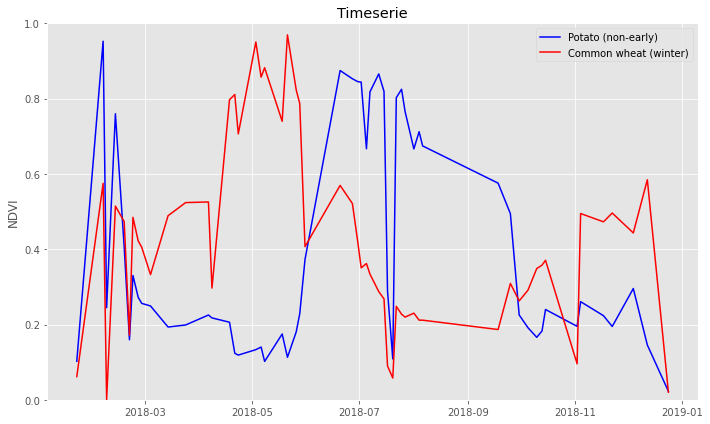

In [7]:
plt.style.use('ggplot')
#print(plt.style.available)


fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Timeserie')

ax.plot(df['NDVI_1580076457'], color='blue', label='Potato (non-early)')
ax.plot(df['NDVI_1580135170'], color='red', label='Common wheat (winter)')

ax.legend(loc='upper right')
ax.set_ylabel('NDVI')
ax.set_ylim([0, 1])


fig.tight_layout()


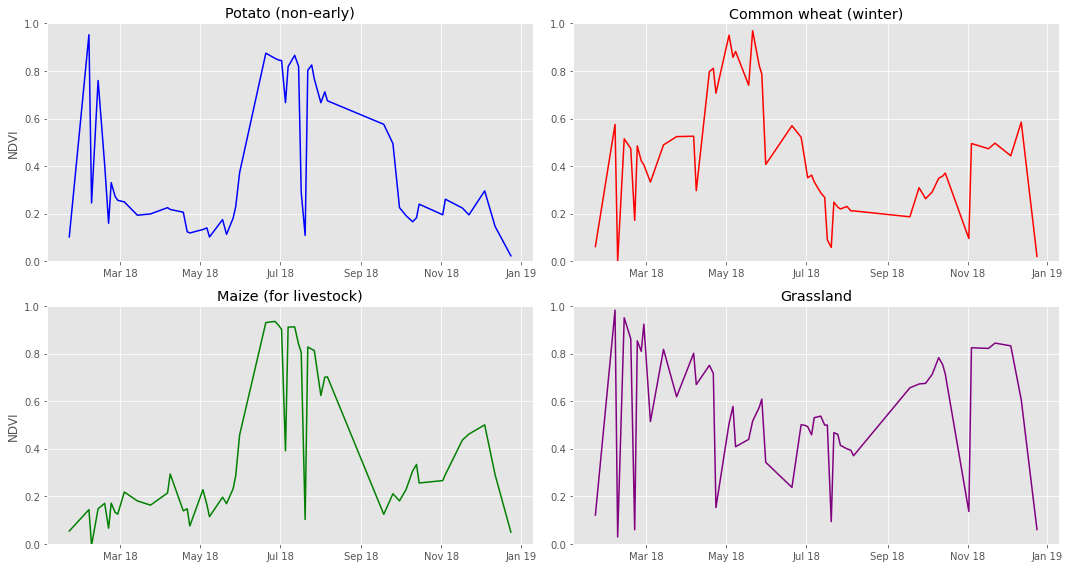

In [8]:
# Set ROI directory
ts_path = f'{output_path}Timeseries/'

# Create ROI directory if missing
Path(ts_path).mkdir(parents=True, exist_ok=True)


plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15, 8))


axes[0,0].set_title('Potato (non-early)')
axes[0,0].plot(df['NDVI_1580076457'], color='blue')
axes[0,0].set_ylabel('NDVI')
axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

axes[0,1].set_title('Common wheat (winter)')
axes[0,1].plot(df['NDVI_1580135170'], color='red')
axes[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

axes[1,0].set_title('Maize (for livestock)')
axes[1,0].plot(df['NDVI_1990011176'], color='green')
axes[1,0].set_ylabel('NDVI')
axes[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

axes[1,1].set_title('Grassland')
axes[1,1].plot(df['NDVI_1805103211'], color='purple')
axes[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))


plt.setp(axes, ylim=(0,1))

fig.tight_layout()

plt.savefig(f'{ts_path}NDVI_subplots.png', dpi=300)


# NOT USED

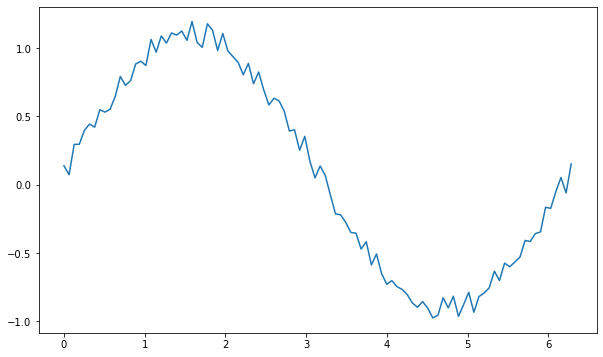

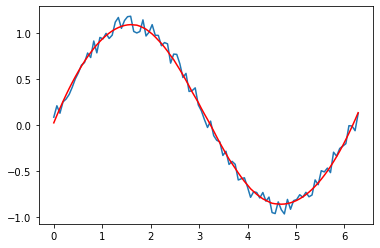

In [6]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2


fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(x,y)
plt.show()

np.random.seed(1)

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = scipy.signal.savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [2]:
path = '/Users/Nicolas/OneDrive - UCL/LBRAT2104/Timeseries/'

ts_filename = f'{path}Sentinel-2 L2A-3_NDVI-Potato.csv'

df = pd.read_csv(ts_filename)

print(f'Display the original DataFrame : \n {df} \n')

print(f'Types of each columns : \n\n {df.dtypes} \n')

print(f'The columns names of the data are : \n\n {df.columns} \n' )

# Select only date, mean and standard deviation

df = df[['C0/date','C0/mean', 'C0/stDev']].rename(columns={'C0/date': 'long_date', 'C0/mean': 'mean', 'C0/stDev': 'stdDev'})

#print(f'Display the new DataFrame : \n {df} \n')
display(df)

# ----------------------------------------------------------------------
def convertDate(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
     return new_date.date()
# ----------------------------------------------------------------------


df['short_date'] = df['long_date'].apply(convertDate)

print(f'Display the new DataFrame : \n {df} \n')


df = df.set_index('short_date')


Display the original DataFrame : 
                      C0/date    C0/min    C0/max   C0/mean  C0/stDev  \
0   2016-12-04T00:00:00.000Z  0.097011  0.712557  0.444357  0.243395   
1   2016-12-14T00:00:00.000Z  0.075028  0.273483  0.127093  0.023707   
2   2016-12-27T00:00:00.000Z  0.082467  0.368421  0.160351  0.036378   
3   2017-02-15T00:00:00.000Z  0.130550  0.321026  0.194570  0.037577   
4   2017-03-07T00:00:00.000Z  0.100350  0.325740  0.190122  0.044540   
..                       ...       ...       ...       ...       ...   
56  2018-07-25T00:00:00.000Z  0.452572  0.904629  0.838163  0.064306   
57  2018-07-27T00:00:00.000Z  0.453385  0.829149  0.752128  0.056665   
58  2018-08-04T00:00:00.000Z  0.313167  0.801245  0.699427  0.061678   
59  2018-08-06T00:00:00.000Z  0.457613  0.808487  0.693549  0.054763   
60  2018-08-19T00:00:00.000Z  0.495807  0.802578  0.681627  0.061031   

    C0/median    C0/p10    C0/p90  C0/cloudCoveragePercent  
0    0.620321  0.130478  0.679228      

,long_date,mean,stdDev
0,2016-12-04T00:00:00.000Z,0.444357,0.243395
1,2016-12-14T00:00:00.000Z,0.127093,0.023707
2,2016-12-27T00:00:00.000Z,0.160351,0.036378
3,2017-02-15T00:00:00.000Z,0.194570,0.037577
4,2017-03-07T00:00:00.000Z,0.190122,0.044540
...,...,...,...
56,2018-07-25T00:00:00.000Z,0.838163,0.064306
57,2018-07-27T00:00:00.000Z,0.752128,0.056665
58,2018-08-04T00:00:00.000Z,0.699427,0.061678
59,2018-08-06T00:00:00.000Z,0.693549,0.054763


Display the new DataFrame : 
                    long_date      mean    stdDev  short_date
0   2016-12-04T00:00:00.000Z  0.444357  0.243395  2016-12-04
1   2016-12-14T00:00:00.000Z  0.127093  0.023707  2016-12-14
2   2016-12-27T00:00:00.000Z  0.160351  0.036378  2016-12-27
3   2017-02-15T00:00:00.000Z  0.194570  0.037577  2017-02-15
4   2017-03-07T00:00:00.000Z  0.190122  0.044540  2017-03-07
..                       ...       ...       ...         ...
56  2018-07-25T00:00:00.000Z  0.838163  0.064306  2018-07-25
57  2018-07-27T00:00:00.000Z  0.752128  0.056665  2018-07-27
58  2018-08-04T00:00:00.000Z  0.699427  0.061678  2018-08-04
59  2018-08-06T00:00:00.000Z  0.693549  0.054763  2018-08-06
60  2018-08-19T00:00:00.000Z  0.681627  0.061031  2018-08-19

[61 rows x 4 columns] 

